# Matrice di correlazione e Modello di Random Forest: quanto e cosa influisce di più sulla scelta di un vincitore?

Ed è proprio qui che, dopo tutto quello di cui abbiamo parlato finora, giungiamo per fare il punto della situazione: quali tra tutti i parametri di cui abbiamo parlato finora, influisce maggiormente sulla posizione in classifica e sulla creazione di una canzone vincitrice?

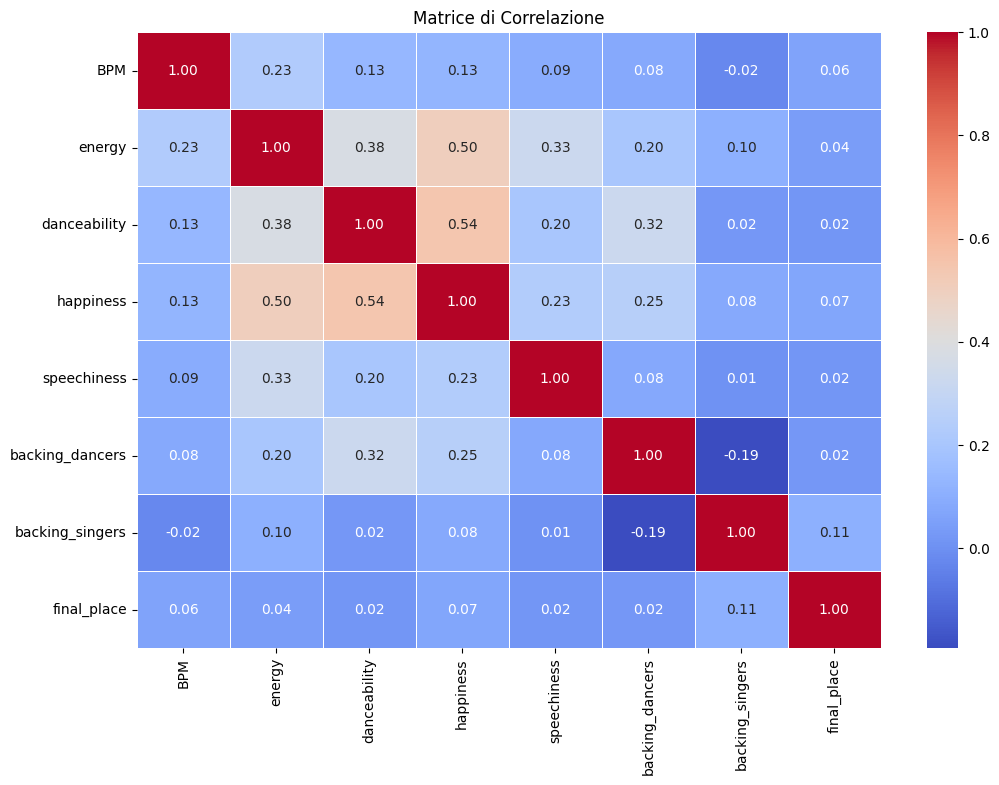

Correlazioni con final_place:
danceability       0.016388
speechiness        0.017740
backing_dancers    0.024699
energy             0.040454
BPM                0.057901
happiness          0.068972
backing_singers    0.105888
final_place        1.000000
Name: final_place, dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Carica il file CSV
file_path = './song_data.csv'
pd.set_option('display.max_rows', None)
data = pd.read_csv(file_path, encoding='latin1')

columns_of_interest = ['BPM', 'energy', 'danceability', 'happiness', 'speechiness', 'backing_dancers', 'backing_singers', 'final_place']
data_filtered = data[columns_of_interest].dropna()

# Calcola la matrice di correlazione
correlation_matrix = data_filtered.corr()

# Visualizza la matrice di correlazione
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice di Correlazione')
plt.show()

# Mostra solo le correlazioni con final_place
final_place_corr = correlation_matrix['final_place'].sort_values()
print("Correlazioni con final_place:")
print(final_place_corr)

Analizzando la matrice di correlazione, notiamo che ogni elemento combacia e ha una rilevanza precisa con il contesto eurovisivo: ad esempio, a un certo livello di BPM è associata un determinato valore di energia, così come la felicità va di pari passo con l'energia e la ballabilità di una canzone e, quest'ultima, è legata alla presenza di un corpo di ballo durante l'esibizione.

Quello che però, in questo caso, ci interessa maggiormente, è sicuramente la relazione tra questi valori e la posizione finale in classifica: in generale non c'è un valore determinante che produce una differenza assoluta rispetto ai valori definiti.
Tra tutti quelli illustrati possiamo vedere come sia la presenza di coristi ad avere leggermente la meglio rispetto ad altri fattori ma, comunque, questo elemento non si discosta molto da ciò di cui avevamo parlato in precedenza rispetto agli effetti della presenza o meno di un coro/coristi durante un'esibizione.


# The winner of the next Eurovision Song Contest is...

Ci chiediamo, quindi, se possa essere possibile (alla luce di tutti gli elementi raccolti) avere una panoramica completa sulle caratteristiche di un vincitore: quali sono gli elementi che contribuiscono di più alla vittoria, a prescindere dalla persona, nazione, età del/i concorrente/i?

Accuratezza del modello: 0.95


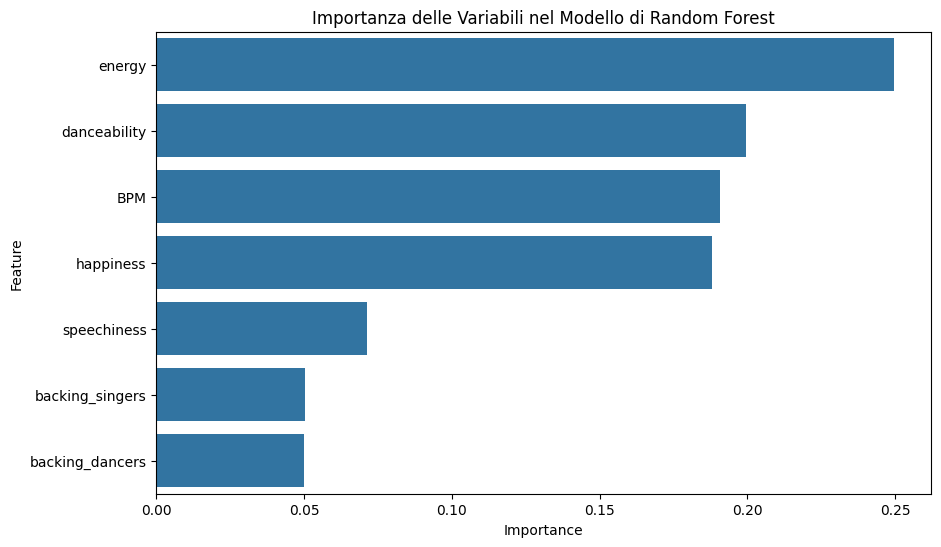

           Feature  Importance
1           energy    0.249783
2     danceability    0.199460
0              BPM    0.190830
3        happiness    0.188227
4      speechiness    0.071344
6  backing_singers    0.050347
5  backing_dancers    0.050009


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Prepara i dati per il modello
data_filtered['winner'] = data_filtered['final_place'] == 1
X = data_filtered[['BPM', 'energy', 'danceability', 'happiness', 'speechiness', 'backing_dancers', 'backing_singers']]
y = data_filtered['winner']

# Dividi i dati in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crea e addestra il modello di Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prevedi sul test set e calcola l'accuratezza
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuratezza del modello: {accuracy:.2f}')

# Estrai l'importanza delle variabili
feature_importances = rf.feature_importances_
features = X.columns

# Crea un dataframe per visualizzare l'importanza delle variabili
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualizza l'importanza delle variabili
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importanza delle Variabili nel Modello di Random Forest')
plt.show()

print(importance_df)

Utilizzando il modello di predizione Random Forest, siamo in grado di dare una risposta accurata al 95% (rispetto agli ultimi 15 anni).

Ed è qui che, in particolare, ben 4 elementi prendono il sopravvento rispetto agli altri: in ordine abbiamo *energia* (25%), *ballabilità* (20%), *BPM* (19%) e *felicità/allegria* (18.8%).
Fattori che risultano essere, oltre che in coesione, elementi di spicco per la decisione riguardo la vittoria del famoso contest canoro.


# Discussione finale ed eventuali sviluppi futuri

E' bene, però, comunque ricordare che ciò che stiamo prendendo in considerazione è soltanto una piccola parte di circa 60 anni di storia eurovisiva.
Ciò che potrebbe essere considerato come una struttura vecchio stile con elementi che, magari, non corrispondono alla vittoria sicura come nel modello presentato, non possa essere considerato (una volta allargato il modello alla storia eurovisiva intera) un "successo di altri tempi".
Quello che è stato ricreato, è un piccolo sprazzo legato agli ultimi anni eurovisivi, in particolare sottolineati dalla presenza contemporanea di voti di giuria e pubblico, cosa che in precedenza non esisteva: sicuramente questo, unito alla recente introduzione delle semifinali/qualificazione alla serata finale, comporta sicuramente uno spostamento anche dal punto di vista di tendenze e fattori utili alla vittoria del proprio brano.